In [2]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.4 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import os
import itertools
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import statsmodels.api as smapi
from statsmodels.tsa.arima_model import ARIMAResults

# Load dữ liệu từ file CSV
data = pd.read_csv('Data.csv')
data['Date']=pd.to_datetime(data['Date'])
el_data=data.set_index('Date')
# Chọn thuộc tính
features = [ "Avg Temp"]
target = 'Avg Temp'

# Chuẩn bị dữ liệu
x = data[features].values
y = data[target].values

# Chia thành train set và test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
x_train, y_train = np.array(x_train), np.array(y_train)
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaler = scaler.fit(x_train)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [4]:
import statsmodels.api as smapi
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_predict

In [5]:
history = [x for x in x_train]
predictions = []

In [6]:
for t in range(len(x_test)):

    model = smapi.tsa.arima.ARIMA(history, order=(1,1,1))
    model_fit = model.fit()

    output = model_fit.forecast()
    predict = output[0]
    predictions.append(float(predict))

    x = x_test[t]
    history.append(x)

    print('predicted = %f, expected = %f' % (predict, x))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted = 0.597244, expected = 0.582781
predicted = 0.568214, expected = 0.450331
predicted = 0.480715, expected = 0.629139
predicted = 0.598045, expected = 0.582781
predicted = 0.569066, expected = 0.503311
predicted = 0.517016, expected = 0.516556
predicted = 0.524998, expected = 0.483444
predicted = 0.502449, expected = 0.423841
predicted = 0.461586, expected = 0.384106
predicted = 0.432729, expected = 0.456954
predicted = 0.478397, expected = 0.649007
predicted = 0.604963, expected = 0.556291
predicted = 0.545891, expected = 0.483444
predicted = 0.498100, expected = 0.377483
predicted = 0.426732, expected = 0.450331
predicted = 0.472235, expected = 0.516556
predicted = 0.514939, expected = 0.503311
predicted = 0.506234, expected = 0.337748
predicted = 0.396027, expected = 0.165563
predicted = 0.263345, expected = 0.205298
predicted = 0.292944, expected = 0.278146
predicted = 0.339317, expected = 0.218543
predicted = 0.294991, expected = 0.364238
predicted = 0.388559, expected = 0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 0.748705, expected = 0.735099
predicted = 0.702292, expected = 0.701987
predicted = 0.681566, expected = 0.688742
predicted = 0.673728, expected = 0.761589
predicted = 0.724737, expected = 0.695364
predicted = 0.681531, expected = 0.814570
predicted = 0.764314, expected = 0.814570
predicted = 0.767579, expected = 0.827815
predicted = 0.779789, expected = 0.841060
predicted = 0.792123, expected = 0.913907
predicted = 0.845812, expected = 0.874172
predicted = 0.823031, expected = 0.801325
predicted = 0.776118, expected = 0.807947
predicted = 0.782453, expected = 0.794702
predicted = 0.775052, expected = 0.894040
predicted = 0.845169, expected = 0.913907
predicted = 0.862424, expected = 0.807947
predicted = 0.792705, expected = 0.655629
predicted = 0.688250, expected = 0.801325
predicted = 0.786834, expected = 0.814570
predicted = 0.796966, expected = 0.821192
predicted = 0.802754, expected = 0.894040
predicted = 0.854196, expected = 0.920530
predicted = 0.875268, expected = 0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 0.841509, expected = 0.741722
predicted = 0.781278, expected = 0.834437
predicted = 0.842312, expected = 0.933775
predicted = 0.909969, expected = 0.814570
predicted = 0.829833, expected = 0.695364
predicted = 0.746868, expected = 0.768212
predicted = 0.793348, expected = 0.880795
predicted = 0.868835, expected = 0.993377
predicted = 0.946892, expected = 0.801325
predicted = 0.818492, expected = 0.556291
predicted = 0.649220, expected = 0.649007
predicted = 0.706401, expected = 0.814570
predicted = 0.815944, expected = 0.834437
predicted = 0.829443, expected = 0.807947
predicted = 0.811663, expected = 0.596026
predicted = 0.666429, expected = 0.377483
predicted = 0.509989, expected = 0.523179
predicted = 0.601289, expected = 0.662252
predicted = 0.691813, expected = 0.728477
predicted = 0.701073, expected = 0.675497


In [26]:
import pickle
# Save model
with open('ARIMA.pkl', 'wb') as pkl:
    pickle.dump(model_fit, pkl)
# Load model
with open('ARIMA.pkl', 'rb') as model_file:
    model_arima = pickle.load(model_file)

In [27]:
prediction_copies = np.repeat(predictions, len(features), axis=-1)
predicted = scaler.inverse_transform(prediction_copies.reshape(-1,1))[:,0]

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
Scale = MinMaxScaler()

# Tính và hiển thị MAE
mae = mean_absolute_error(Scale.fit_transform(y_test.reshape(-1, 1)), Scale.fit_transform(predicted.reshape(-1, 1)))
print("Mean Absolute Error (MAE):", mae)

# Tính và hiển thị MSE
mse = mean_squared_error(Scale.fit_transform(y_test.reshape(-1, 1)), Scale.fit_transform(predicted.reshape(-1, 1)))
print("Mean Squared Error (MSE):", mse)

# Tính và hiển thị R2
r2=r2_score((y_test), (predicted))
print("R Square:", r2)

Mean Absolute Error (MAE): 0.08338160575904742
Mean Squared Error (MSE): 0.011767618994286714
R Square: 0.7843280619858483


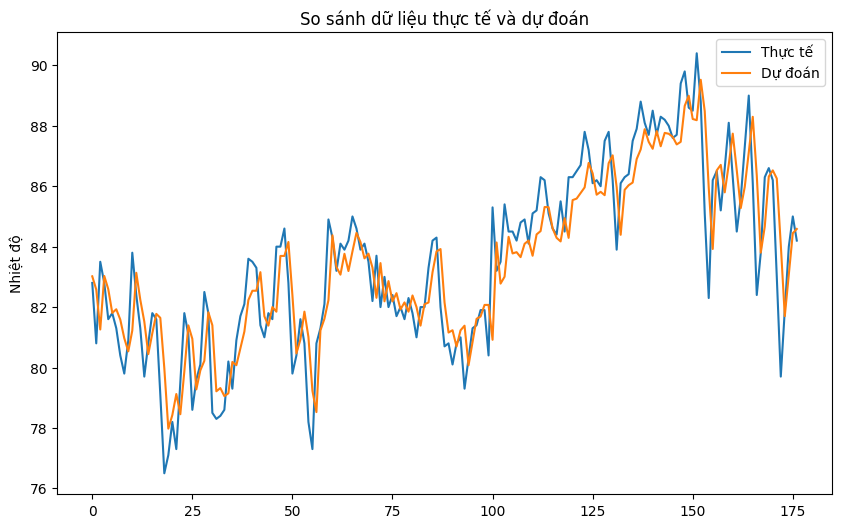

In [29]:
import matplotlib.pyplot as plt

# Tạo array index cho biểu đồ
index = range(len(y_test))

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(index, y_test, label='Thực tế')
plt.plot(index, predicted, label='Dự đoán')
plt.xlabel('')
plt.ylabel('Nhiệt độ')
plt.title('So sánh dữ liệu thực tế và dự đoán')
plt.legend()
plt.show()

In [31]:
n_days_for_prediction = 7
predicted_future = []
History = [x for x in x_train]+[y for y in x_test]
for i in range (0,n_days_for_prediction):
    model_arima = smapi.tsa.arima.ARIMA(History, order=(1,1,1))
    model_arima_fit = model_arima.fit()

    output = model_arima_fit.forecast()
    predicted = scaler.inverse_transform(output[0].reshape(-1,1))
    predicted_future.append(float(predicted))
    History.append(output)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.p

<ipython-input-33-58540608ac12>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


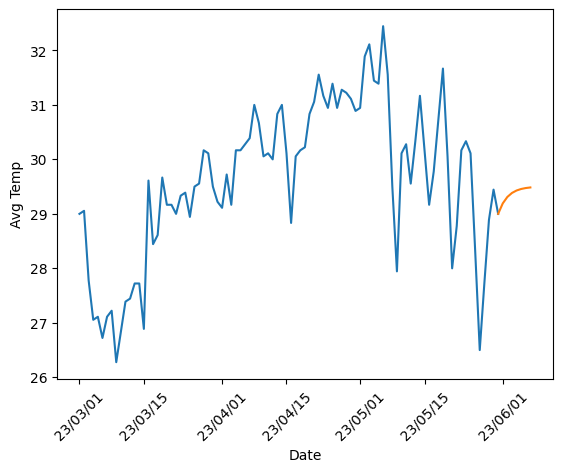

In [33]:
import seaborn as sns
import matplotlib.dates as mdates
original = data[['Date', 'Avg Temp']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2023-3-1']

forecast_period = pd.date_range(list(original['Date'])[-1], periods=n_days_for_prediction+1, freq='1d').tolist()

sns.lineplot(original, x = original['Date'], y = (original['Avg Temp']-32)*(5/9))
sns.lineplot(x = forecast_period, y = (np.insert(predicted_future, 0, y[-1:])-32)*(5/9))
# Định dạng lại nhãn trục x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y/%m/%d'))

# Hiển thị biểu đồ
plt.xticks(rotation=45)  # Để xoay nhãn trục x nếu cần

plt.show()